In [2]:
!pip install matplotlib


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])


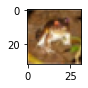

In [10]:
plot_sample(0)#frog

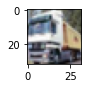

In [11]:
plot_sample(1)#truck

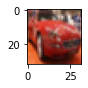

In [12]:
plot_sample(5)

In [13]:

classes=["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

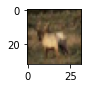

In [14]:
plot_sample(3)

In [15]:
classes[y_train[3][0]]

'deer'

In [16]:
#scaling the img
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [17]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
y_train[0:7]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In [19]:
#one hot encoding iin keras
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)


In [20]:
y_train_categorical[0:7]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)


In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
#flatten the array to 1d

In [24]:
#model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),#hidden layer relu prefferd
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 41s 27ms/step - loss: 1.8641 - accuracy: 0.3341
Epoch 2/50
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6600 - accuracy: 0.4120
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5688 - accuracy: 0.44541s - loss: 1.5686 -  - ETA: 
Epoch 4/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5101 - accuracy: 0.4661
Epoch 5/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4583 - accuracy: 0.4854
Epoch 6/50
 473/1563 [========>.....................] - ETA: 40s - loss: 1.4255 - accuracy: 0.4939

KeyboardInterrupt: 

In [53]:
y_test[0]

array([3], dtype=uint8)

In [54]:
classes[y_test[0][0]]

'cat'

In [58]:
 np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 1s 3ms/step


8

In [59]:
classes[np.argmax(model.predict(X_test_scaled)[1])]


313/313 [==============================] - 1s 2ms/step


'ship'

In [60]:
classes[y_test[1][0]]

'ship'

In [61]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 1.5888 - accuracy: 0.5628


[1.5888367891311646, 0.5627999901771545]

In [62]:
def get_model():
  model=keras.Sequential([
  keras.layers.Flatten(input_shape=(32,32,3)),
  keras.layers.Dense(3000,activation='relu'),#hidden layer relu prefferd
  keras.layers.Dense(1000,activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')
    ])
  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [63]:
#for cpu performance
%%timeit -n1 -r1 # time measuring
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 124s 79ms/step - loss: 1.8125 - accuracy: 0.3554
2min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [64]:
#for gpu
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8106 - accuracy: 0.3529
15.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
